## Zach's Hypothesis Testing Notebook

In [1]:
# comments are my explaination/understanding of what is being illustrated
# bring in needed libraries
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

In [2]:
# set up default chart basics
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

Simulation Based Approach  
Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.  
Theory: Our population is the 1000 tickets we have manufactured  
Implementation: Create a boolean pandas Series  
we model win with true and lose with false  
because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


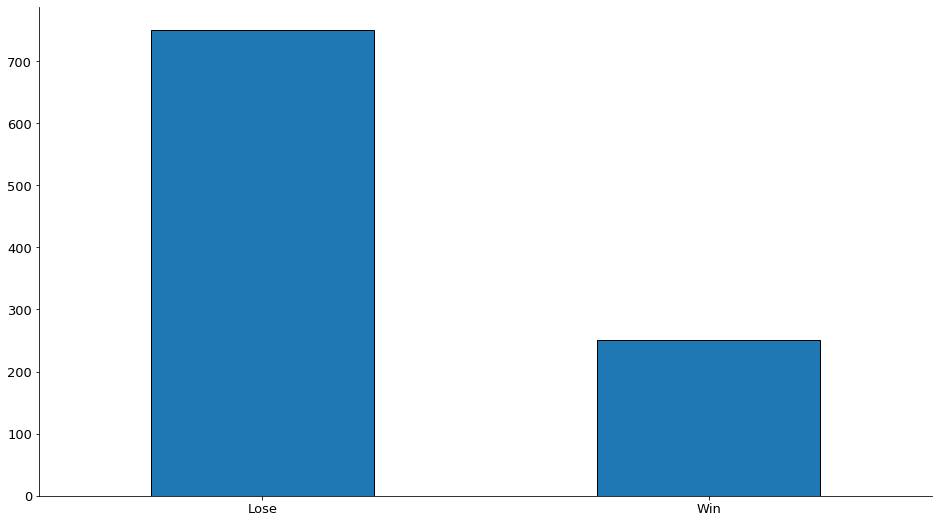

In [3]:
# create variable "tickets" which represents the 1000 tickets we've printed and make 250 of them winners
tickets = pd.Series([True] * 250 + [False] * 750)
# use the value_counts method to create a visualization of the win/lose ratio
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
# x axis label must have needed to be straightened
plt.xticks(rotation=0)
# the the probability of winning and have python calculate the odds of winning based on what we created
print('The actual probability of winning is %.2f' % tickets.mean())

Scenario: Each student in a classroom is given a Golden Cody scratch off at random
Theory

We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

Examples of biased samples:

non-response: people that don't respond are a diff population  
undercoverage: some groups aren't well represented  
voluntary: people volunteer for surveys  
leading questions  
social desirability  
Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [4]:
# this is explained above, selects a random sample of 25 tickets and gives the mean of that sample
n = 25
tickets.sample(n).mean()

0.12

Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.  
Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.  
Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [5]:
# implementation above details what this code does
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

Theory

The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

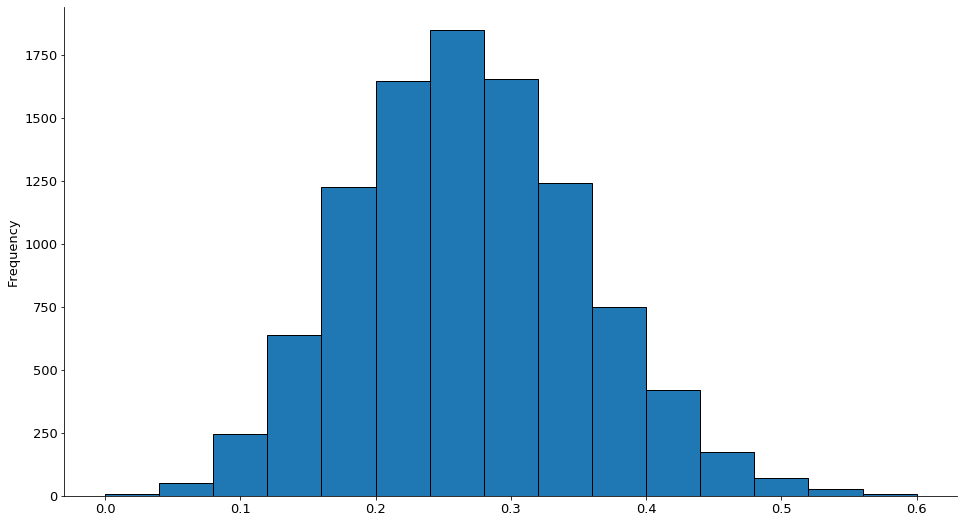

In [6]:
# this is the actual code to produce the 10,000 samples and chart the results
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

Theory

The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

Mini Exercise -- CLT
Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

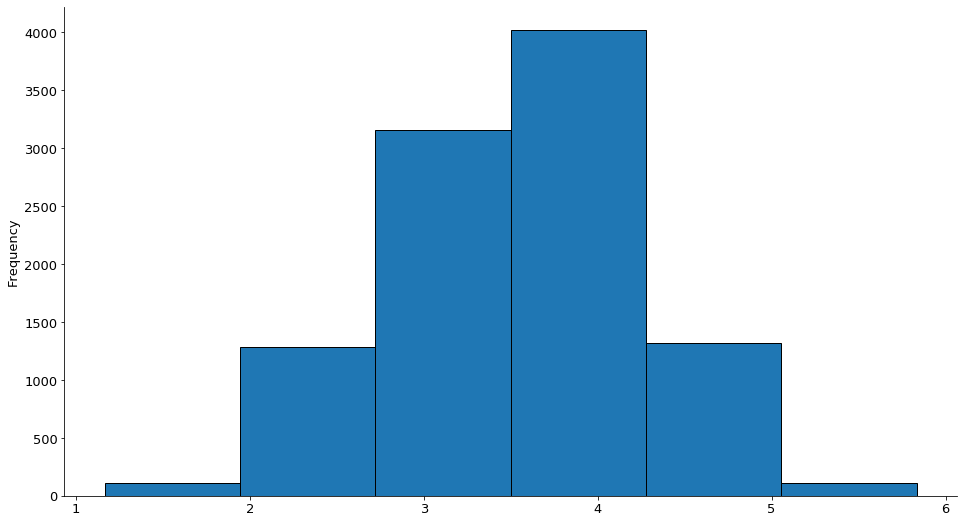

In [22]:
# use random choice to select value of 1-6, 10,000 sets of 6 numbers each and take the average of each set
sets = np.random.choice([1,2,3,4,5,6], size=(10000, 6))
sets = pd.DataFrame(sets)
# get the average by row
averages = sets.mean(axis=1)

# plot the averages
averages.plot.hist(bins=6)


Theory: in practice, we won't have 10,000 samples to work with, but rather just 1.  
We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

the mean of the sampling distribution of the sample means will be the "true" mean  
the variance of the sampling distribution is the population variable divided by the sample size 
the standard deviation of the sampling distribution is $√(pq/n)$
 (for our example), aka the standard error

In [23]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:


In [24]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

confidence intervals for population parameter estimates (e.g. estimating the population mean)  
as n goes up, interval becomes smaller  
as certainty goes up, interval becomes larger  
99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)  
hypothesis testing  
One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [25]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.

### Null and Alternative Hypothesis  
H0: status quo: no difference or no effect  
Ha: alternative: there is a difference or effect  
whether Ha is ≠, <, >, determines one-tailed vs two-tailed test  
< or > == one-tailed  
≠ == two-tailed

### Hypothesis Testing Results
                       H0is true	             H0is false
    Fail to reject H0   TN	                     FN (Type II)
    Reject H0           FP (Type I)	             TP


### Mini Exercise -- Null + Alternate Hypothesis and Errors  
For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

Are the average grades in web development vs data science classes different?  
Is there a relationship between how early a student shows up to class and their grade?  
Are web dev or data science students more likely to be coffee drinkers?  

#### Are the average grades in web development vs data science classes different?
Ho = the average grades for wd and ds are the same  
Ha = the average grades for ds are lower than wd

True positive: the ds average is lower than wd  
True negative: the averages are the same

Type I error: we say the ds grades are lower when the averages are the same  
Type II error: we say the grades are the same with the ds average is lower

#### Is there a relationship between how early a student shows up to class and their grade?
Ho = there is no relationship between how early a student arrives and their grade  
Ha = students who arrive early have higher grades

True pos: the grades of students who arrive early are higher  
True neg: there is no difference between the grades of students who are early vs who are not early

Type I error: we say that students who arrive early have higher grades, but they don't  
Type II error: we say that there is no relationship between a studen arriving early and grades, but there is


#### Are web dev or data science students more likely to be coffee drinkers?
Ho = wd and ds are equally likely to be coffee drinkers  
Ha = ds are more likely to be coffee drinkers

True pos: ds students drink more coffee
True neg: find wd and ds students are equally likely to be coffee drinkers  

Type I error: say that ds students are more likely to be coffee drinkers when they are not  
Type II error: say they are equally likely when they are not

# Hypothesis Testing - Cirriculum Exercises


### Overview
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

Is the website redesign any good?

Is our television ad driving more sales?

#### Has the network latency gone up since we switched internet service providers?
Ho = network latency has remained the same since we switched internet service providers  
Ha = network latency has increased since we switched internet service providers

True positive = measured network latency is higher than before the switch, and it is higher  
True negative = measured network latency is the same as before the switch, and it is the same  

Type I error = measured network latency says it is higher, but is actually the same  
Type II error = measured network latency says it is the same, but it is actually higher

#### Is the website redesign any good?
Ho = the average time spent viewing the website is the same as before the redesign  
Ha = the average time spent viewing the website has increased after the redsign

True positive = time spent has increased  
True negatvie = there has been no change to time spent viewing the site

Type I error = deciding time spent is higher after redesign when it is not  
Type II error = deciding time spent is the same when in fact it is higher after the redesign

#### Is our television ad driving more sales?
Ho = our sales were not impacted by the TV ad  
Ha = our sales are higher because of the TV ad

True pos: our sales are higher because of the ad  
True neg: our sales are the same regardless of the ad

Type I error: we say the ad increased our sales when it did not  
Type II error: we say the ad had no effect 

### T-Test
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [62]:
office1 = np.random.normal(90, 15, 40)
office2 = np.random.normal(100, 20, 50)
alpha = 0.05

(array([4., 1., 5., 3., 7., 4., 3., 5., 4., 4.]),
 array([ 64.10395208,  68.89759747,  73.69124287,  78.48488827,
         83.27853366,  88.07217906,  92.86582446,  97.65946986,
        102.45311525, 107.24676065, 112.04040605]),
 <a list of 10 Patch objects>)

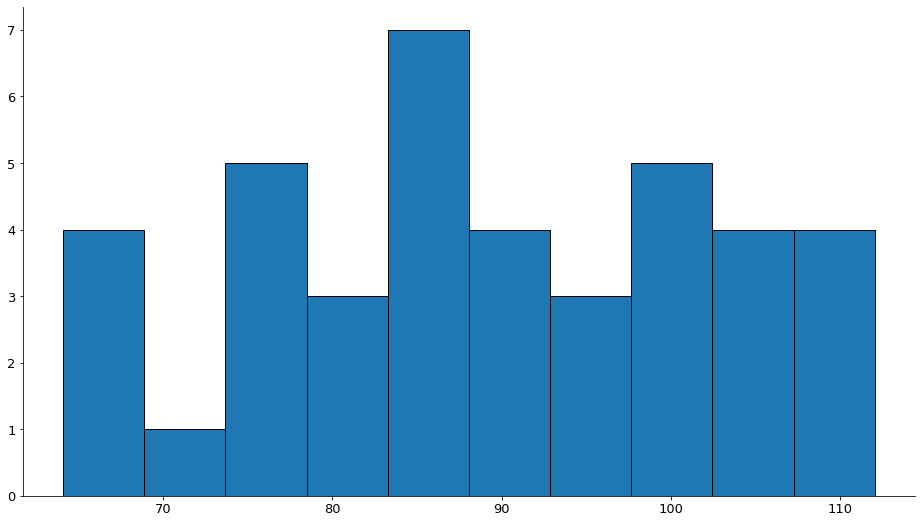

In [67]:
plt.hist(office1)

(array([ 2.,  3.,  1., 12.,  7., 10.,  6.,  3.,  2.,  4.]),
 array([ 47.79417958,  58.3625033 ,  68.93082702,  79.49915075,
         90.06747447, 100.63579819, 111.20412191, 121.77244563,
        132.34076935, 142.90909307, 153.4774168 ]),
 <a list of 10 Patch objects>)

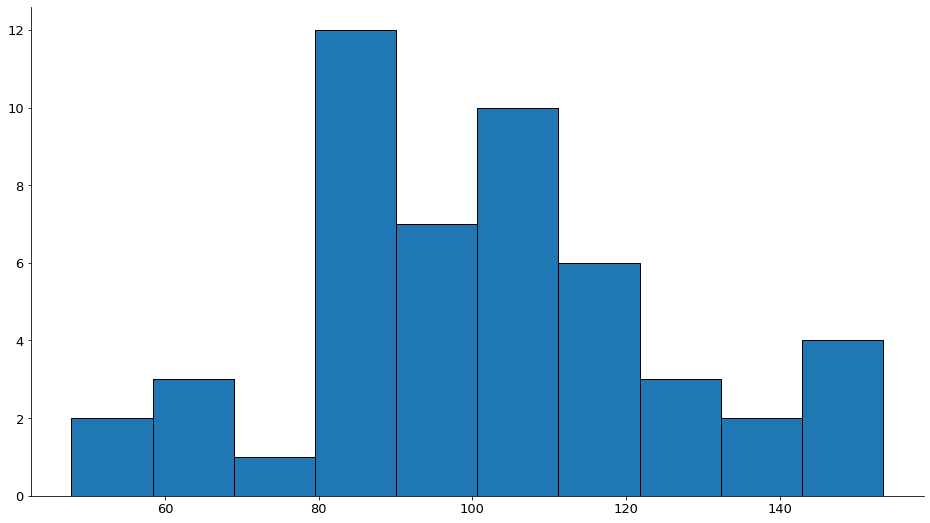

In [68]:
plt.hist(office2)

Ho = there is no difference in the average time to sell homes  
Ha = this is a significant difference in the average time between office 1 and office 2

In [44]:
#office1 = office1.mean(axis=1)
#office2 = office2.mean(axis=1)

In [63]:
print(office1.var())

print(office2.var())

173.40882675346765
554.282219158263


In [64]:
t, p = stats.ttest_ind(office1, office2, equal_var=False)

t, p

(-3.0820899740139294, 0.0028230543845440175)

In [61]:
p<alpha

True

The p value is less than the alpha of .05 so the null hypothesis is rejected meaning the difference in average sale time is significant.

### Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

In [3]:
mpg = data('mpg')
mpg.head()
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [7]:
# add a column to average city and hwy mpg
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) /2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,auto_manual,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0


In [8]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# set variables for year 1999 and 2008, using highway mpg for comparison
mpg1999 = mpg[mpg.year == 1999].avg_mpg
mpg2008 = mpg[mpg.year == 2008].avg_mpg

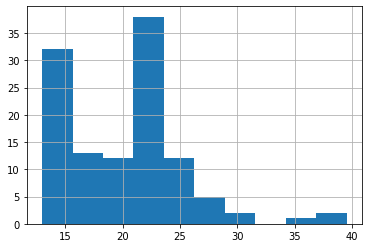

In [9]:
mpg1999.hist()

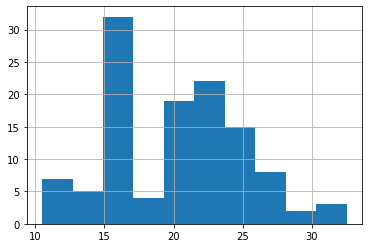

In [10]:
mpg2008.hist()

In [11]:
mpg1999.var()

27.122605363984682

In [12]:
mpg2008.var()

24.097480106100797

variances are close, can leave equal_var at True
Ho = there is no significant difference in mpg in 1999 cars vs. 2008 cars
Ha = cars from 2008 have better mpg
alpha = .05

In [14]:
t, p = stats.ttest_ind(mpg1999, mpg2008, equal_var=False)

t, p

(0.21960177245940962, 0.8263750772060638)

a p value higher than alpha means we do NOT reject the null hypothesis, so there is no significant difference between mpg in cars from 1999 vs 2008  

In [15]:
# Are compact cars more fuel-efficient than the average car?

# df.rename(columns={"A": "a", "B": "c"})
mpg = mpg.rename(columns={"class": "car_class"})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,auto_manual,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0


In [16]:
# set variable for compact vs not compact car, compare on hwy again
compact = mpg[mpg.car_class == 'compact'].avg_mpg
notcompact = mpg[mpg.car_class != 'compact'].avg_mpg

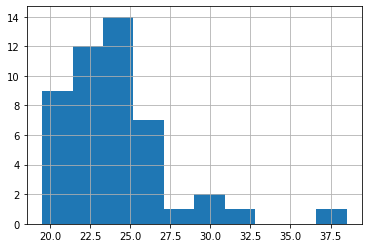

In [17]:
compact.hist()

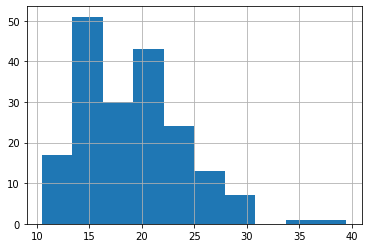

In [18]:
notcompact.hist()

In [20]:
print(compact.var())
print(notcompact.var())

12.442876965772433
23.652794548904602


variance are too far appart, set equal_var to False  
Ho = there is no significant difference in mpg in compact cars vs. non-compact cars  
Ha = compact cars have better mpg  
alpha = .05

In [21]:
t, p = stats.ttest_ind(compact, notcompact, equal_var=False)

t, p

(8.128810422808078, 1.6018060656123074e-12)

the p value is less than alpha so we reject the Ho  
the t value is positive which would indicate that the compact car mpg is better than non-compact

In [22]:
# Do manual cars get better gas mileage than automatic cars?
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,auto_manual,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0


In [23]:
# add column to classify if each row is auto or manual
# mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

mpg['auto_manual'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,auto_manual,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0


In [28]:
# set variables to compare transmission type mpg
mpgauto = mpg[mpg.auto_manual == 'auto'].avg_mpg
mpgman = mpg[mpg.auto_manual == 'manual'].avg_mpg
alpha = .05

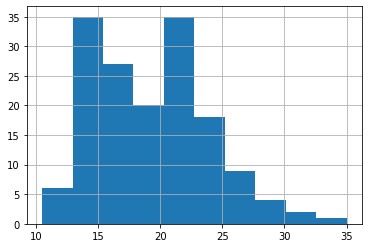

In [30]:
mpgauto.hist()


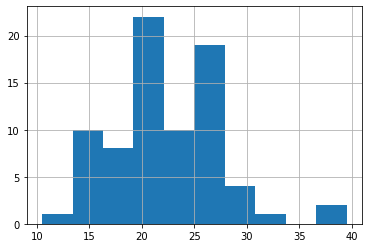

In [31]:
mpgman.hist()

In [32]:
print(mpgauto.var())
print(mpgman.var())

21.942777233382337
26.635167464114826


Ho = there is no difference between automatic and manual transmission agerage mpg  
Ha = there is a difference between automatic and manual transmission agerage mpg

In [33]:
t, p = stats.ttest_ind(compact, notcompact, equal_var=False)

t, p

(8.128810422808078, 1.6018060656123074e-12)

In [34]:
p<alpha

True

the p is less than alpha so we reject the Ho and say there is a difference between cars with automatic vs manual tranmission average mpg

### Correlation
Use the telco_churn data.

Does tenure correlate with monthly charges? Total charges? 

What happens if you control for phone and internet service?

Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Use the sleepstudy data. Is there a relationship between days and reaction time?

### Chi Square

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
CS = Codeup Student
NCS = Not Codeup Student

                             CS	 NCS
            Uses a Macbook	49	20
    Doesn't Use A Macbook	  1	30


Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$
contingency table test with them. 

Be sure to state your null and alternative hypotheses.

Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager?

### More Examples

Use the data from the employees database to answer these questions:

Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.